# Desafio 1 - Estatística do Básico ao Avançado 

##### **Desafio Ifood**

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal
- O objetivo de hoje é fazer uma análise exploratória desses dados. Responda usando a sua ferramenta de preferência:

# Iniciando análise descritiva

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\camil\AppData\Local\Temp\ipykernel_20164\1285016483.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Quantos dados temos? Linhas e colunas 
- Quais são as colunas numéricas?
- Temos duplicados na nossa base? Se tivermos, retire-os 
- Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles? 
- Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas? 

In [2]:
df = pd.read_csv("C:\\Users\\camil\\Desktop\\Journey in Data\\Desafio 1 - EBA\\mkt_data.csv")
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


In [3]:
# Verificando o formato (LxC) do meu df
df.shape

(2205, 44)

Temos 2205 linhas e 44 colunas

In [4]:
# Verificando as informações das colunas do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [5]:
# Listando todos os possíveis formatos de número do df para selecionar apenas as numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include = numerics).columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')

As colunas numéricas são as litadas acima

In [6]:
# Verificando quantos dados duplicados existem para ver se é necessário eliminá-los
df.duplicated().sum()

0

Não existem valores duplicados

In [7]:
# Verificando se existem valores nulos no df
df.isna().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

Existem dados nulos na base, nas colunas: marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD. Provavelmente são informações que os usuários não forneceram durante o cadastro no sistema ou que a pessoa não tem aquela característica.

In [8]:
df['education_2n Cycle'].value_counts()
# df.education_Basic.value_counts()
# df.education_Graduation.value_counts()
# df.education_Master.value_counts()
# df.education_PhD.value_counts()

education_2n Cycle
1.0    198
Name: count, dtype: int64

In [9]:
# df.marital_Divorced.value_counts()
# df.marital_Married.value_counts()
# df.marital_Single.value_counts()
# df.marital_Together.value_counts()
df.marital_Widow.value_counts()


marital_Widow
2.0    76
Name: count, dtype: int64

Como é possível observar acima, a coluna adota um único valor (1) apresentado 198 vezes para a coluna education_2n Cycle. Partindo da análise dos valores das colunas, é possível perceber que temos como atributos:
- 1: education_2n Cycle
- 2: education_Basic
- 3: education_Graduation
- 4: education_Master
- 5: education_PhD
---
- 1: marital_Divorced
- 2: marital_Widow
- 3: marital_Together
- 4: marital_Single
- 5: marital_Married

O que é um grande indicativo de que os valores que estão nulos é porque, provavelmente, a pessoa não tem aquela determinada variável. Então, é interessante transformar esses valores em booleano: 1 - fez, 0 - não fez.

In [10]:
colunas_com_nulos = [
    'marital_Divorced', 
    'marital_Married', 
    'marital_Single', 
    'marital_Together', 
    'marital_Widow', 
    'education_2n Cycle', 
    'education_Basic', 
    'education_Graduation', 
    'education_Master', 
    'education_PhD']

In [11]:
for item in colunas_com_nulos:
    df['booleano'+str(item)] = np.where(df[item].isnull(), 0, 1)

In [12]:
df.columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_status', 'education_level', 'kids',
       'expenses', 'booleanomarital_Divorced', 'booleanomarital_Married',
       'booleanomarital_Single', 'booleanomarital_Together',
       'booleanomarital_Widow', 'booleanoeducation_2n Cycle',
       'bool

In [13]:
# Analisando medidas para as colunas numéricas
df.describe(include = numerics)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,booleanomarital_Divorced,booleanomarital_Married,booleanomarital_Single,booleanomarital_Together,booleanomarital_Widow,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Vamos agora entender o perfil de clientes que temos

- Qual é o maior salário encontrado na nossa base? Veja na coluna Income
- Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income
- Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level
- Quantos clientes temos em cada estado civil? Veja na coluna marital_status

In [14]:
df.Income.describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

O maior salário na base é 113.734,00

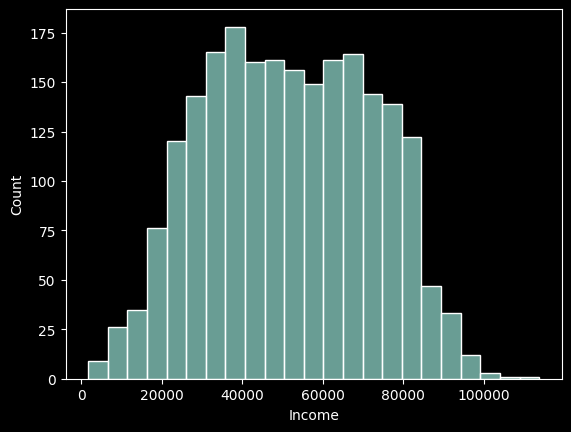

In [15]:
# Analisando a distribuição do salário
fig = sns.histplot(x='Income', data = df)

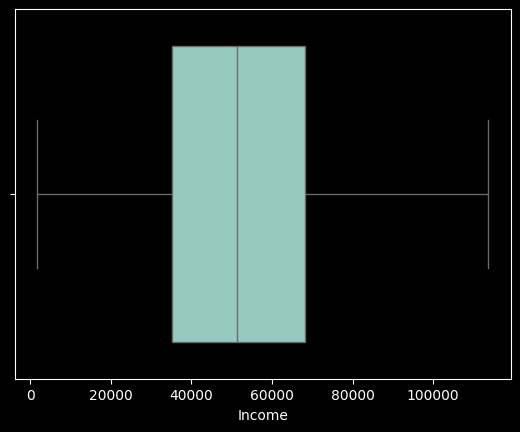

In [16]:
# Analisando a distribuição do salário
fig = sns.boxplot(x = 'Income', data = df)

Além de analisar os gráficos, podemos calcular o coeficiente de variação. Ele, nada mais é, do que uma média que fornece uma compreensão relativa da variabilidade dos dados, permitindo que sejam feitas comparações entre diferentes conjuntos de dados. Quanto mais próximo de 1, mais dispersos os dados estão em relação à média.

In [17]:
cv = (df.Income.std()/df.Income.mean())*100
cv
    # (desvio / media )*100

40.12441554786958

Podemos notar que nossos dados estão dispersos, com um coeficiênte de variação de 40%.

Além disso, podemos analisar a distribuição por meio do cálculo do skew. Ele fornece um cálculo para verificar quanto os dados estão distribuídos simetricamente em relação à média. Dessa forma:
- skew > 0 : assimetria positiva (à direita). A cauda da curva será mais longa para valores maiores do eixo x.
- skew < 0: assimetria negativa (à esquerda). A cauda da curva será mais longa para valores menores do eixo x.
- skew = 0: Distribuição simétrica (Curva normal).

In [18]:
df.Income.skew()

0.013164263414417078

Temos, então, uma curva próxima de normal.

In [19]:
# Verificando qual nível de educação dos clientes

df.education_level.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

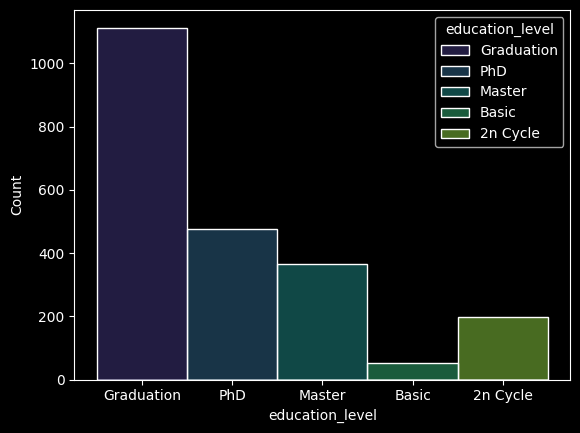

In [20]:
fig = sns.histplot(x = 'education_level', data = df, hue = 'education_level', palette = 'viridis')

Notamos que os níveis de educação são bem discrepantes, mas, em sua maioria, os clientes possuem graduação. No geral, pode-se dizer que os clientes tem níveis superiores de educação.

In [21]:
# Vendo quantos clientes tem em cada estado civil

df.marital_status.value_counts()

marital_status
Married     854
Together    568
Single      477
Divorced    230
Widow        76
Name: count, dtype: int64

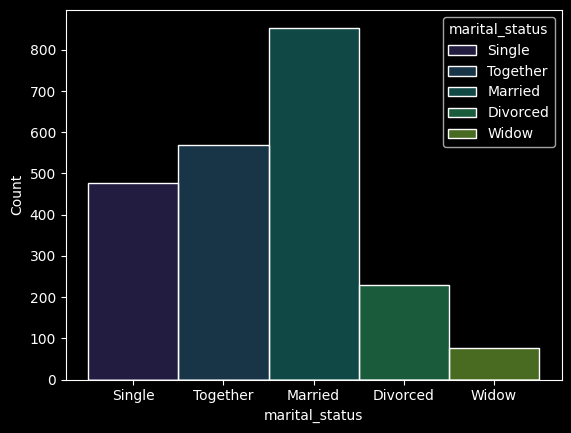

In [22]:
fig = sns.histplot(x='marital_status', data = df, hue = 'marital_status', palette = 'viridis')

A maior parte dos clientes é casada ou moram juntos e poucos são viúvos.

Agora vamos ver como os dados se correlacionam

- Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids
- As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids
- Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses

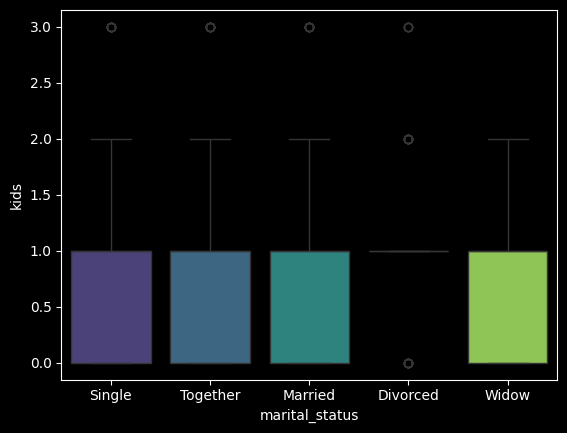

In [23]:
# Vendo como o estado civil se relaciona com o número de filhos

fig = sns.boxplot(x='marital_status', y ='kids', data = df, hue = 'marital_status', palette = 'viridis')

# fig = sns.scatterplot(x='marital_status', y ='kids', data= df, hue ='marital_status', palette = 'viridis')

In [24]:
# Entendendo porque o boxplot de divorced está estranho

df.query("marital_status == 'Divorced'")["kids"].value_counts()

kids
1    119
0     57
2     49
3      5
Name: count, dtype: int64

In [25]:
df.groupby(['marital_status']).kids.describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


In [26]:
# Calculando mediana de filhos por status de união

df.groupby('marital_status').kids.median()

marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64

Os números são bem próximos. Olhando somente a média, podemos indicar que os solteiros tem uma quantidade menor de filhos quando comparado aos outros grupos. Porém, quando analisamos no boxplot e mediana os números estão muito próximos uns dos outros. Por isso, seria necessário um teste de hipótese para comprovar as diferenças.

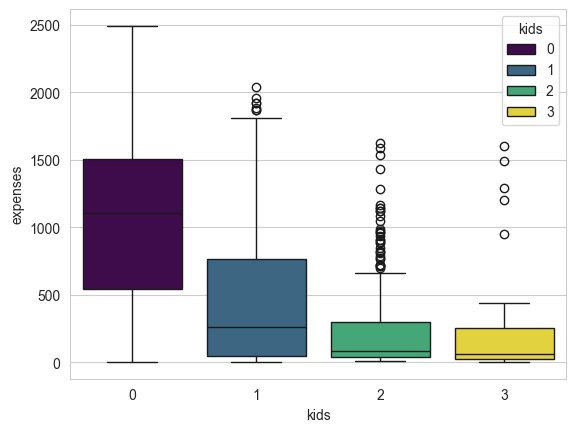

In [27]:
sns.set_style('whitegrid')
fig = sns.boxplot(x='kids', y='expenses', data = df, hue = 'kids', palette = 'viridis')

In [28]:
# Vendo se as pessoas gastam mais ou menos quando tem filhos

df.groupby('kids').expenses.describe()

,count,mean,std,min,25%,50%,75%,max
kids,,,,,,,,
0,628.0,1041.207006,625.734894,5.0,546.00,1106.5,1505.50,2491.0
1,1112.0,434.530576,452.606603,4.0,50.00,264.0,762.25,2036.0
2,415.0,221.568675,290.259678,8.0,39.00,84.0,296.50,1627.0
3,50.0,237.380000,390.174157,6.0,28.25,62.0,254.00,1601.0


Até aqui podemos inferir que as pessoas tendem a gastar mais quando não tem filhos ou quando tem só 1. Notamos também alguns outliers para 1, 2 ou 3 filhos, o que influencia no cálculo da média. Vamos analisar mais.

In [29]:
# Mediana

df.groupby('kids').expenses.median()

kids
0    1106.5
1     264.0
2      84.0
3      62.0
Name: expenses, dtype: float64

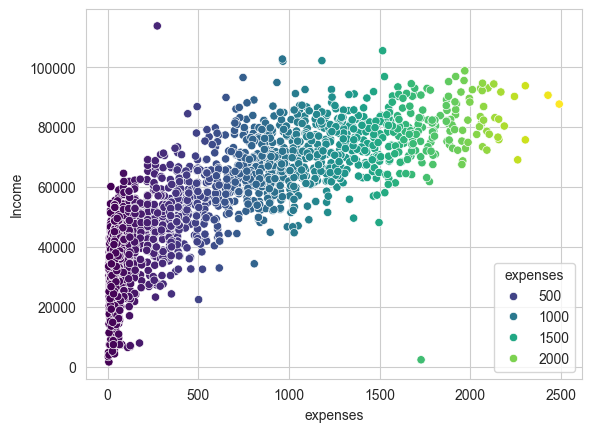

In [30]:
# Analisando se pessoas que tem maior salário gastam mais

fig = sns.scatterplot(x='expenses', y= 'Income', data = df, hue = 'expenses', palette = 'viridis')

In [31]:
df['expenses'].corr(df['Income'])

0.823066002139838

A correlação de Pearson indica um resultado de 0.82. Com isso, aparentemente existe uma correlação diretamente proporcional, em que as pessoas que ganham mais também gastam mais.